In [1]:
from elas import *
import numpy as np
import cv2 as cv
from skimage.io import imread

import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15, 15]

In [3]:
image1 = 'img/urban1_left.pgm'
image2 = 'img/urban1_right.pgm'

im1 = imread(image1)
im2 = imread(image2)

d1 = np.empty_like(im1, dtype=np.float32)
d2 = np.empty_like(im2, dtype=np.float32)

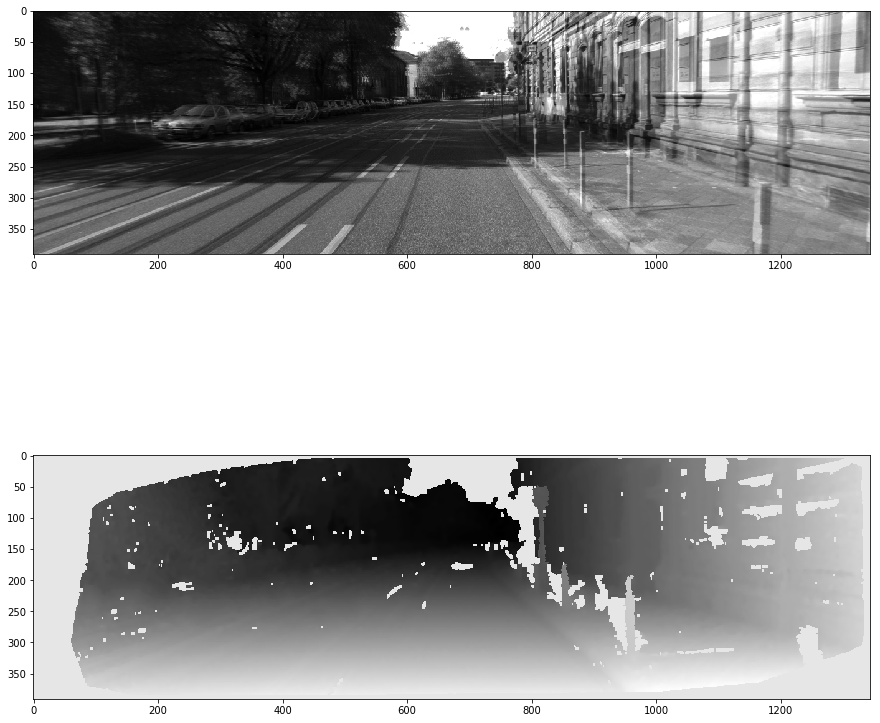

In [4]:
params = Elas_parameters()
params.postprocess_only_left = False
elas = Elas(params)
elas.process_stereo(im1, im2, d1, d2)

scaled_d1 = (d1 / np.amax(d1) * 255.0).astype(np.uint8)

blended = cv.addWeighted(im1,0.5,im2,0.5,0)
plt.subplot(211); plt.imshow(blended,cmap='gray');
plt.subplot(212); plt.imshow(scaled_d1,cmap='gray');